In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score 

dataframe = pd.read_csv('CarPrice_Assignment.csv')
dataframe.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataframe.isnull().sum()
print(dataframe.shape)

(205, 26)


In [4]:
df= dataframe.select_dtypes(include='number')
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<function matplotlib.pyplot.show(close=None, block=None)>

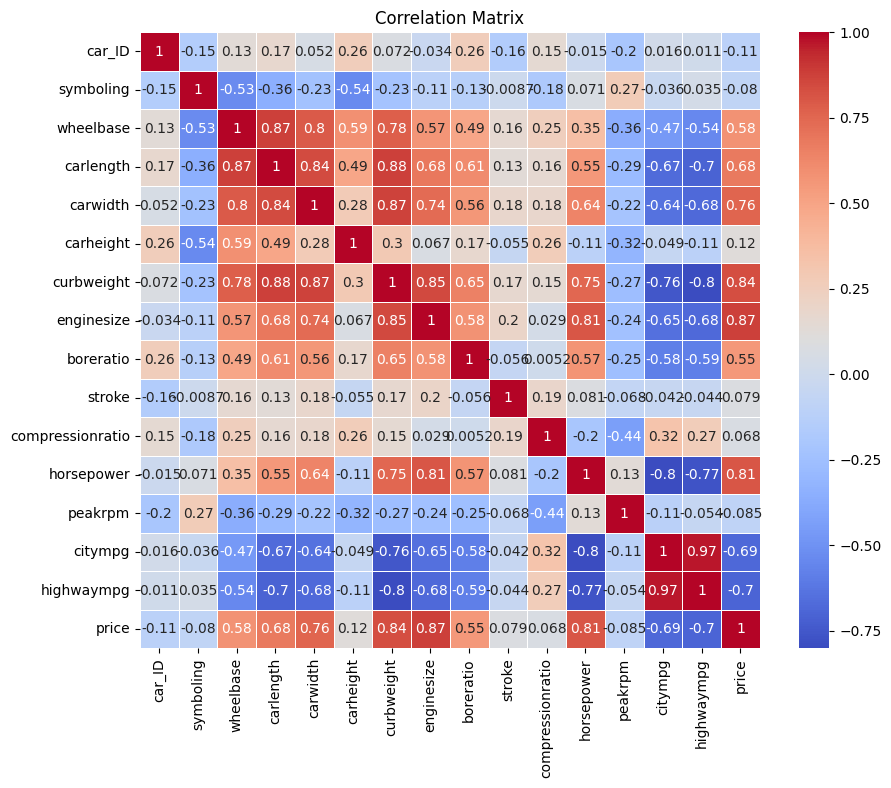

In [5]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,linewidths=0.5)
plt.title('Correlation Matrix')
plt.show


##### From above correlation-matrix the columns [wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower] are strongly correlated to price

In [6]:
dataframe_ref = df[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']]

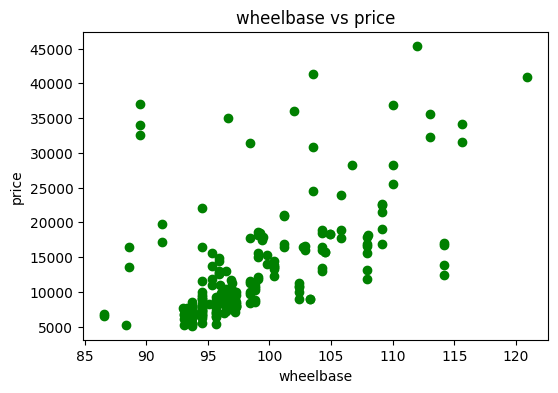

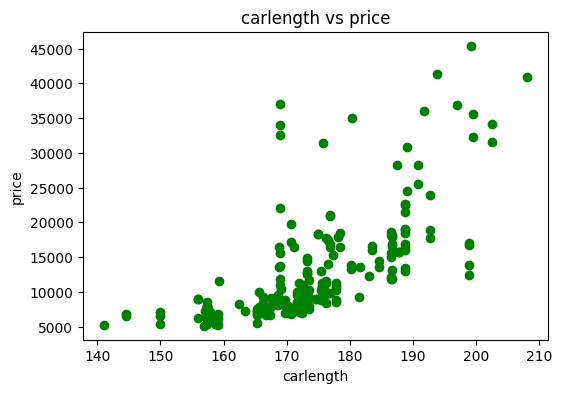

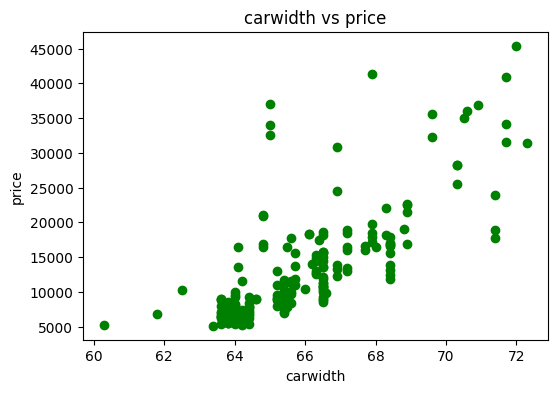

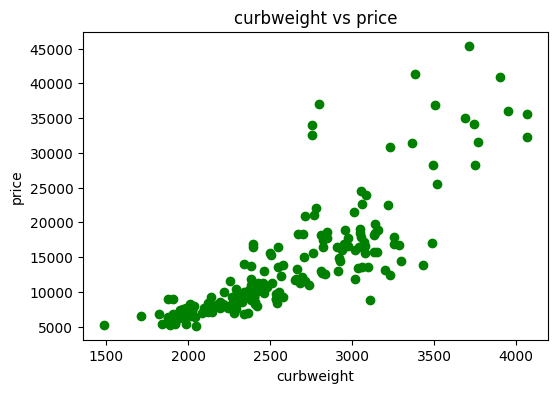

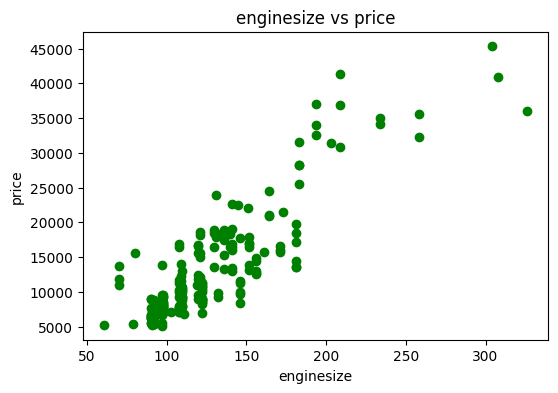

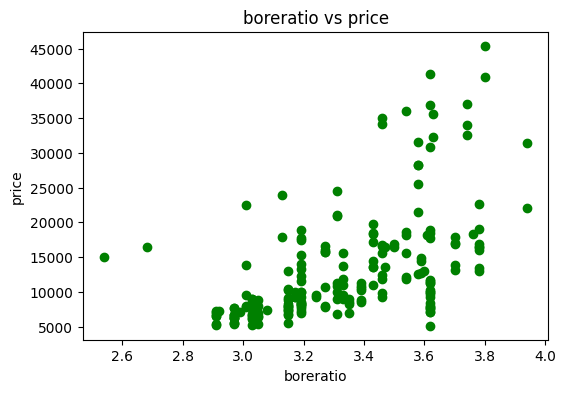

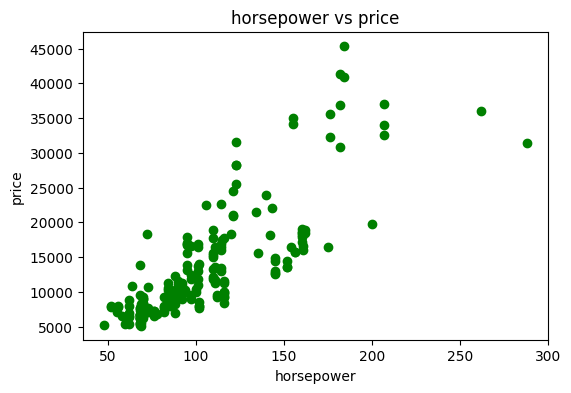

In [7]:
# Scatter plots of all numeric vlues against price
def scatter_plot(subset):
    y_axis = subset['price'] 
    columns = subset.columns
    for column in columns:
        if column != 'price':
            x_axis = subset[column]
            plt.figure(figsize=(6,4))
            plt.scatter(x_axis,y_axis,color='g')
            plt.xlabel(column)
            plt.ylabel('price')
            plt.title(f'{column} vs price')
            plt.show()

scatter_plot(dataframe_ref)
        

In [8]:
df1 = df[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']]
df1.head(4)
df1.shape

(205, 8)

In [9]:
df1.duplicated(subset='price')
df1.drop_duplicates(subset='price',keep='last',inplace=False)
df1.shape

(205, 8)

In [10]:
X = df1[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower']]
print(X.shape)
y = df1[['price']]
print(y.shape)

lin_reg = LinearRegression()
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)


(205, 7)
(205, 1)


In [11]:
print('Xtrain: ',Xtrain.shape)
print('Xtest: ',Xtest.shape)
print('ytrain: ',ytrain.shape)
print('ytest: ',ytest.shape)

Xtrain:  (164, 7)
Xtest:  (41, 7)
ytrain:  (164, 1)
ytest:  (41, 1)


In [12]:
reg = lin_reg.fit(Xtrain,ytrain)
y_pred = reg.predict(Xtest)
y_pred.shape

(41, 1)

In [13]:
print('Intercept: ',reg.intercept_)
print('Coefficient: ',reg.coef_)

Intercept:  [-46974.16650206]
Coefficient:  [[  25.41748066  -21.09810238  626.54505353    2.37869725   77.66223229
  -477.18805711   54.86551136]]


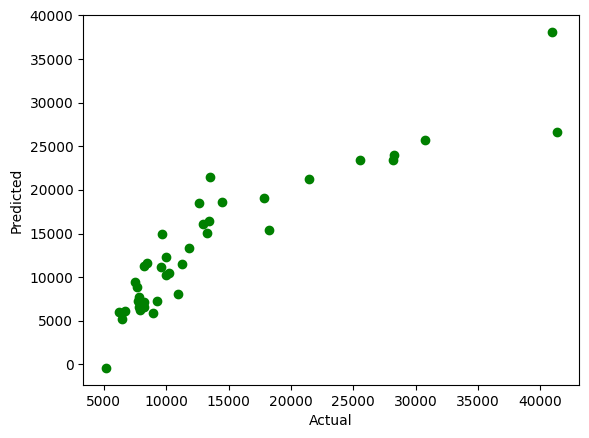

In [14]:
plt.scatter(ytest,y_pred,color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy:  76.32335918689108


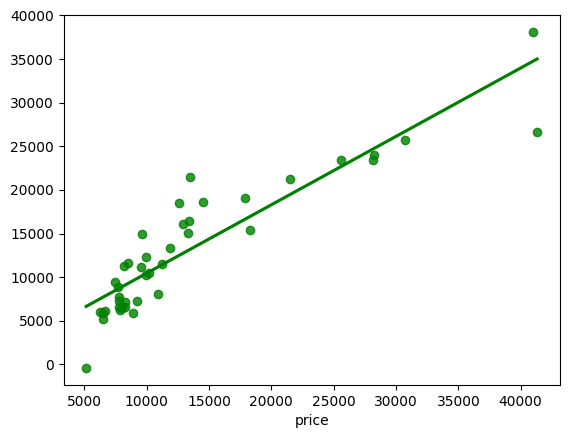

In [15]:
import seaborn as sns

accuracy = r2_score(y_pred,ytest)
print('Accuracy: ',accuracy*100)
sns.regplot(x = ytest,y = y_pred,ci=None,color='green')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

2650.078529557598
13888381.467098987
3726.711884100914
